<a href="https://colab.research.google.com/github/DonovanBilanoski/DonovanBilanoski/blob/main/Mid_Term_Rough_Draft_w_70_20_10_Split_3_6_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Raw Dataset:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Training Set:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
712,0.612245,0.50,0.388060,0,0.676056,0.306818,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
477,0.673469,0.55,0.000000,1,0.338028,0.522727,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
409,0.510204,0.80,0.000000,1,0.436620,0.295455,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
448,0.714286,0.80,0.381426,1,0.316901,0.409091,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
838,0.714286,0.65,0.547264,1,0.507042,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Validation Set:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
789,0.122449,0.590,0.301824,0,0.802817,0.295455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
854,0.489796,0.600,0.538972,0,0.788732,0.318182,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
685,0.673469,0.600,0.431177,0,0.563380,0.704545,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
359,0.510204,0.525,0.000000,0,0.387324,0.295455,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
31,0.571429,0.650,0.276949,0,0.380282,0.295455,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


Test Set:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
72,0.489796,0.600,0.301824,0,0.633803,0.295455,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
903,0.571429,0.650,0.366501,0,0.725352,0.295455,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29,0.469388,0.625,0.311774,0,0.598592,0.295455,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
120,0.387755,0.675,0.411277,1,0.774648,0.295455,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
368,0.591837,0.700,0.000000,0,0.422535,0.522727,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


Validation Accuracy: 0.875
Test Accuracy: 0.8804347826086957
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.93      0.88      0.90        59

    accuracy                           0.88        92
   macro avg       0.87      0.88      0.87        92
weighted avg       0.88      0.88      0.88        92



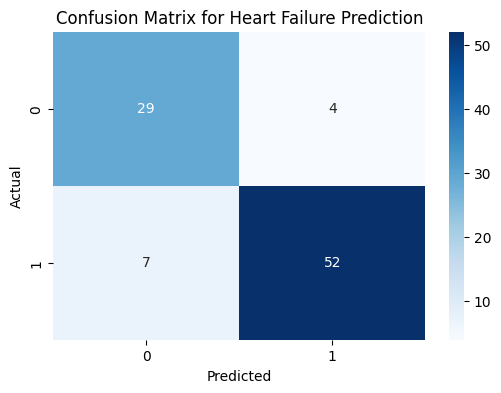

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Machine Learning Mid-Term.xlsx"
xls = pd.ExcelFile(file_path)
df_raw = pd.read_excel(xls, sheet_name='heart (1)')

# Display raw dataset
print("Raw Dataset:")
display(df_raw.head())

# Copy for processing
df = df_raw.copy()

# Defining target variable (assuming 'HeartDisease' is the column for heart failure prediction)
target_col = 'HeartDisease'  # Replace with the actual target column name
y = df[target_col]
df = df.drop(columns=[target_col])

# Encoding categorical variables
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_transformed = encoder.fit_transform(df[categorical_cols])
categorical_df = pd.DataFrame(categorical_transformed, columns=encoder.get_feature_names_out(categorical_cols))

# Scaling numerical features
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Concatenating transformed categorical data with the original dataframe
df = df.drop(columns=categorical_cols)
df = pd.concat([df, categorical_df], axis=1)

# Normalization
normalizer = MinMaxScaler()
df[numerical_cols] = normalizer.fit_transform(df[numerical_cols])

# Splitting dataset into train (70%), validation (20%), and test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(df, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

# Display dataset splits
print("Training Set:")
display(X_train.head())
print("Validation Set:")
display(X_val.head())
print("Test Set:")
display(X_test.head())

# Train a model (Random Forest for heart failure prediction)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on validation and test sets
y_val_pred = clf.predict(X_val)
y_test_pred = clf.predict(X_test)

# Evaluate model performance
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Heart Failure Prediction")
plt.show()

# Save cleaned datasets
X_train.to_csv("train_heart_failure_data.csv", index=False)
X_val.to_csv("val_heart_failure_data.csv", index=False)
X_test.to_csv("test_heart_failure_data.csv", index=False)

